# Takeaway 2
## Section 1: Business Understanding
First, I have check all the questions in the survey and the structure of the answers to know more about the business and also, to know what are the potential question I can ask
### Question:
What are the skills a Developer thinks influence more the Salary, or in other words, the better paid?

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Section 2: Data Understanding

### Gathering

In [2]:
df = pd.read_csv('./data/survey-results-public.csv')
df.shape

(51392, 154)

Getting only the columns that we are interested in

In [3]:
takeaway2 = df[list(df.columns[df.columns.to_series().str.contains('ImportantHiring')]) + ['Salary']]

Since Salary is a important key here, and applying a mean maybe will not provide any gain here, So it is better to drop all NAN 

In [4]:
takeaway2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ImportantHiringAlgorithms         28642 non-null  object 
 1   ImportantHiringTechExp            28694 non-null  object 
 2   ImportantHiringCommunication      28639 non-null  object 
 3   ImportantHiringOpenSource         28596 non-null  object 
 4   ImportantHiringPMExp              28617 non-null  object 
 5   ImportantHiringCompanies          28553 non-null  object 
 6   ImportantHiringTitles             28553 non-null  object 
 7   ImportantHiringEducation          28663 non-null  object 
 8   ImportantHiringRep                28618 non-null  object 
 9   ImportantHiringGettingThingsDone  28545 non-null  object 
 10  Salary                            12891 non-null  float64
dtypes: float64(1), object(10)
memory usage: 4.3+ MB


In [5]:
takeaway2.describe()

,Salary
count,12891.000000
mean,56298.480641
std,39880.905277
min,0.000000
25%,26440.371839
50%,50000.000000
75%,80000.000000
max,197000.000000


## Section 3: Data preparation

### Wrangling

In [6]:
takeaway2 = takeaway2.dropna(subset=['Salary'])
takeaway2.shape

(12891, 11)

In [7]:
takeaway2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12891 entries, 2 to 51390
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ImportantHiringAlgorithms         8666 non-null   object 
 1   ImportantHiringTechExp            8690 non-null   object 
 2   ImportantHiringCommunication      8667 non-null   object 
 3   ImportantHiringOpenSource         8666 non-null   object 
 4   ImportantHiringPMExp              8672 non-null   object 
 5   ImportantHiringCompanies          8667 non-null   object 
 6   ImportantHiringTitles             8647 non-null   object 
 7   ImportantHiringEducation          8687 non-null   object 
 8   ImportantHiringRep                8666 non-null   object 
 9   ImportantHiringGettingThingsDone  8657 non-null   object 
 10  Salary                            12891 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


Im checking that there are more NAN in the other columns, it feels like I can drop the NAN because it will not reduce the sample considerably

In [8]:
takeaway2 = takeaway2.dropna(subset=list(df.columns[df.columns.to_series().str.contains('ImportantHiring')]), how='any')

In [9]:
takeaway2.shape

(8320, 11)

Renaming columns for better understanding

In [10]:
takeaway2.columns = [c.replace('ImportantHiring', '') for c in takeaway2.columns]

Making categorical data into quantitative data

In [11]:
options = dict(zip(['Very important', 'Important', 'Somewhat important', 'Not very important', 'Not at all important'], [10,7,5,3,0]))
for k,v in options.items():
    takeaway2 = takeaway2.replace(k,v)

Now, because I want to analyse how Salary affects, I will create range of Salary grouping by each 10k

In [12]:
takeaway2['count'] = [1] * takeaway2.shape[0]
takeaway2 = takeaway2.groupby(pd.cut(takeaway2["Salary"], np.arange(0, 1.0+200000, 10000))).sum()

<AxesSubplot:xlabel='Salary'>

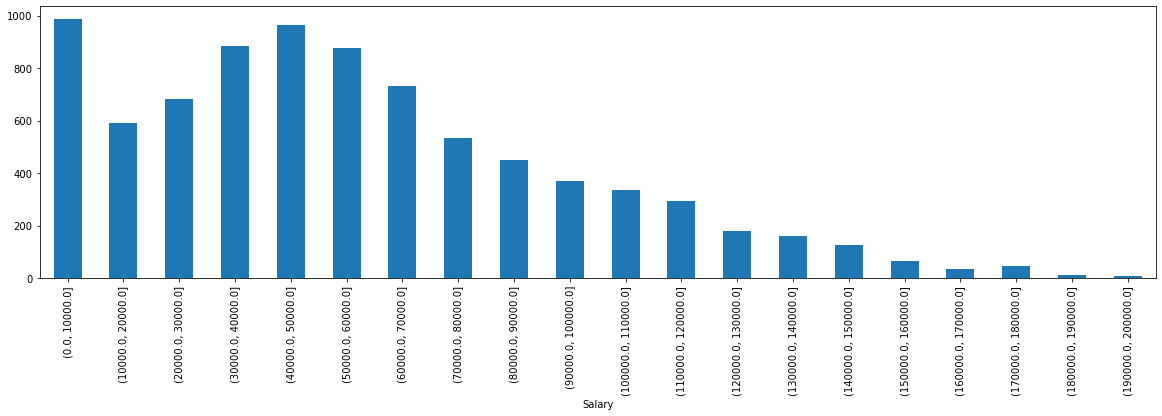

In [13]:
takeaway2['count'].plot(figsize=[20,5], kind='bar')

This plot shows the Salary distribution. It seems that there are a lot of people being paid with less than 10k. Apart of this, it seems to be a normal distribution.

Dropping not used columns. Count was used to count the number of row grouped (to later, devide by it to get the ratio), and the Salary because i created a new column (or index) with the range of Salary

In [14]:
takeaway2 = takeaway2.iloc[:,1:].div(takeaway2['count'], axis=0).drop(['Salary', 'count'], axis=1)

## Section 4: Data Evaluation

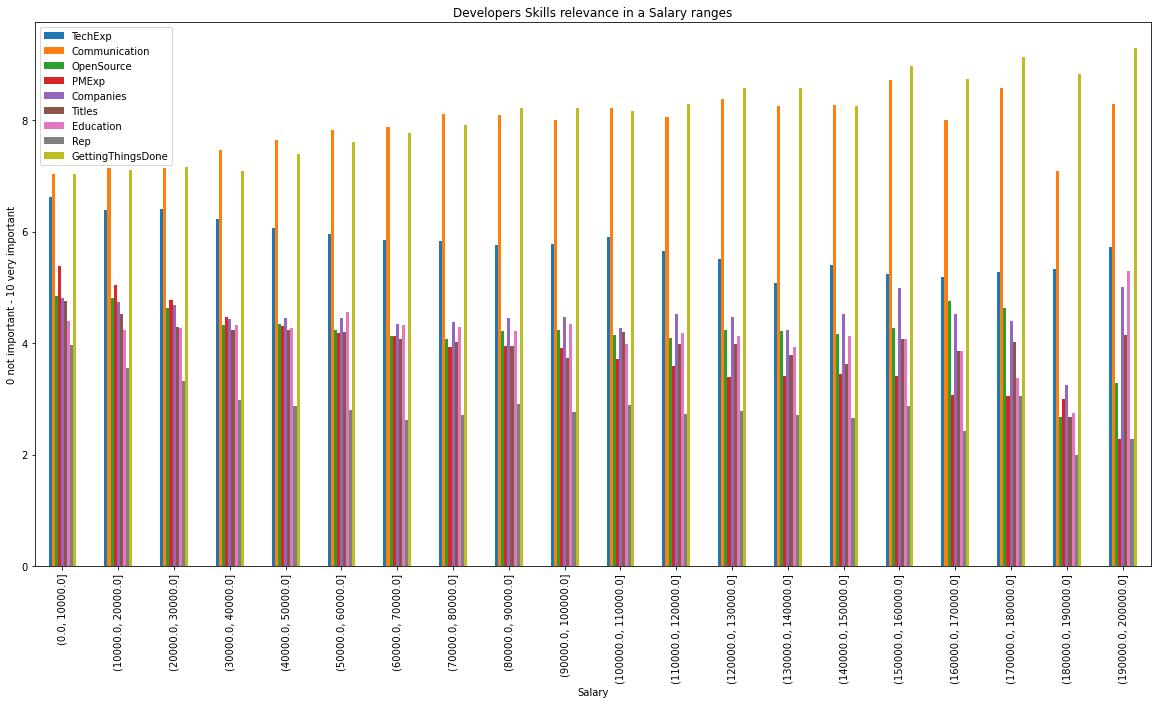

In [15]:
takeaway2.plot(figsize=[20,10], kind='bar', title="Developers Skills relevance in a Salary ranges", ylabel="0 not important - 10 very important");

It seems that effectiveness (gettings thing done), communication and Technical Experience are the most relevant. And there is a little trend to make it even more relevant according to the Salary.
In the other hand, it seems (dont tell my PM) that the PM experience is something that is not longer as much relevent the more you are paid

## Solution:
Despite this question was straightforward, the problem mayor inconvenience was how to create a good graph to represent the data. I tried many options, but at the end, the bar char was the better (IMHO)